## DBSCAN ALGORITHM

**Let’s first import the libraries:**

In [1]:
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
%matplotlib inline

***Here am creating a dataset with 3 clusters with 0.5 standard deviation for each cluster. Number of samples is 400 and 
  we also choose three points as centroids (center of clusters). You can adjust these parameters however you like using 
  make_blobs function.***

In [2]:
#Determine centroids
centers = [[0.5, 2], [-1, -1], [1.5, -1]]

#Create dataset
X, y = make_blobs(n_samples=400, centers=centers, 
                  cluster_std=0.5, random_state=0)

#Normalize the values
X = StandardScaler().fit_transform(X)

**We can also plot the dataset to see how each cluster looks:**

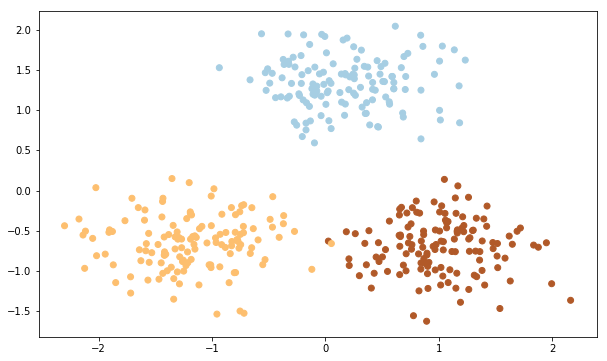

In [16]:
plt.figure(figsize=(10,6))
plt.scatter(X[:,0], X[:,1], c=y, cmap='Paired')
----------------------------------------------------
#x, y : array_like, shape (n, )
#The data positions.

#'c': color, sequence, or sequence of color, optional(If you want to specify the same RGB or RGBA value for all points, use a 2-D array with a single row. 
# Otherwise, value- matching will have precedence in case of a size matching with x and y.)

#'cmap': A Colormap instance or registered colormap name. cmap is only used if c is an array of floats.

**We can now create a DBSCAN object and fit the data:**

In [4]:
from sklearn.cluster import DBSCAN
db = DBSCAN(eps=0.4, min_samples=20)
db.fit(X)

DBSCAN(algorithm='auto', eps=0.4, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=20, n_jobs=None, p=None)

**We just need to define eps and minPts values using eps and min_samples parameters.<br/>
  Note: We do not have to specify the number of clusters for DBSCAN which is a great<br/>
  advantage of DBSCAN over k-means clustering.<br/>
  Let’s visualize the clusters determined by DBSCAN:**

Text(0.5,1,'Clusters determined by DBSCAN')

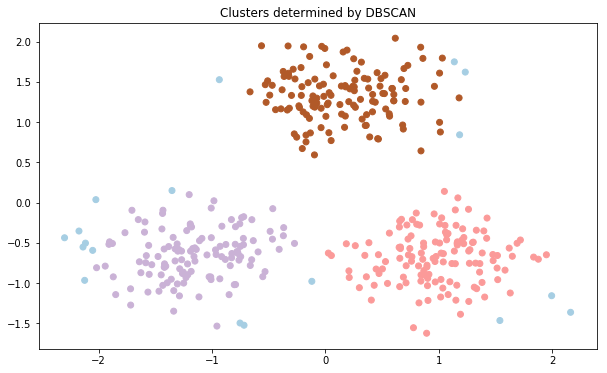

In [5]:
y_pred = db.fit_predict(X)
plt.figure(figsize=(10,6))
plt.scatter(X[:,0], X[:,1],c=y_pred, cmap='Paired')
plt.title("Clusters determined by DBSCAN")

**It was able to detect the outliers (marked with blue).<br/>
  We can access the labels of data points using labels_ attribute.<br/> 
  Noise (or outliers) are given -1 label. Let’s check the number of outliers:**

In [6]:
db.labels_[db.labels_ == -1].size

18

**The clusters in this sample dataset do not have actually have arbitrary shapes. But DBSCAN performed really good at<br/>
  detecting outliers which would not be easy with partition-based (e.g. k-means) or hierarchical (e.g. agglomerative)<br/> 
  clustering techniques. If you also apply DBSCAN to a dataset with arbitrary shaped clusters, you will see the success<br/> 
  of DBSCAN as well.**

### Pros and Cons of DBSCAN

### Pros:
**Does not require to specify number of clusters beforehand.<br/>
Performs well with arbitrary shapes clusters.<br/>
DBSCAN is robust to outliers and able to detect the outliers.**

### Cons:
**In some cases, determining an appropriate distance of neighborhood (eps) is not easy and it requires domain knowledge.<br/>
  If clusters are very different in terms of in-cluster densities, DBSCAN is not well suited to define clusters.<br/> 
  The characteristics of clusters are defined by the combination of eps-minPts parameters.<br/> 
  Since we pass in one eps-minPts combination to the algorithm, it cannot generalize well to clusters with much<br/> 
  different densities.**